In [1]:
def increase_call_stack_limit(mount: int):
    import sys

    # Get the current recursion limit
    current_limit = sys.getrecursionlimit()
    print(f"Current recursion limit: {current_limit}")

    # Set a new recursion limit
    sys.setrecursionlimit(mount)
    print(f"New recursion limit: {mount}")


increase_call_stack_limit(100000)

Current recursion limit: 3000
New recursion limit: 100000


In [2]:
from src.ga.gene.shape.shape_variations import (
    donut_params,
    circle_params,
    triangle_params,
    wing_params,
    hole_params,
    trapezoid_params,
)
from src.ga.gene.shape.shape_gene import ShapeGene

[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json
[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json


In [3]:
N = 35

# Generate random shape genes

In [4]:
genes: list[ShapeGene] = []
for i in range(N):
    genes.extend(
        [
            ShapeGene(donut_params(), gene_id=i),
            ShapeGene(trapezoid_params(), gene_id=i),
            ShapeGene(circle_params(), gene_id=i),
            ShapeGene(triangle_params(), gene_id=i),
            ShapeGene(wing_params(), gene_id=i),
            ShapeGene(hole_params(), gene_id=i),
        ]
    )

# Mutation logics, uncomment to test
for gene in genes:
    gene.mutate("rand")

ShapeGene.pdf_storage.save()
ShapeGene.parameter_storage.save()

# ShapeGene.pdf_storage.plot_distribution("r_inner")

[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[Storage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json


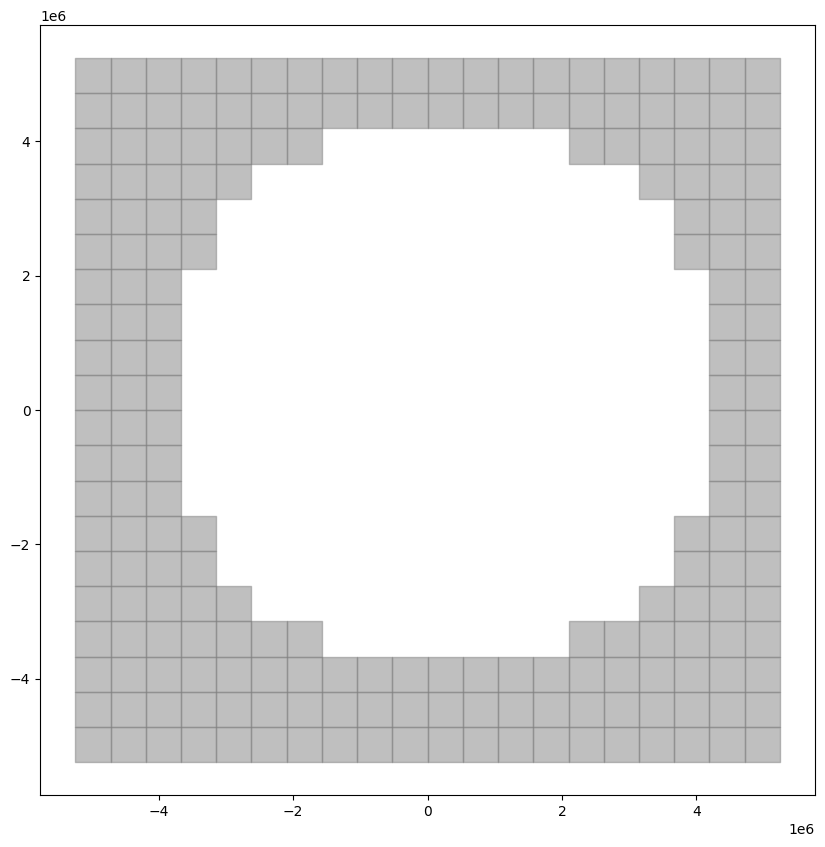

In [5]:
from src.grid.visualize_points import visualize_points


visualize_points(genes[0].pattern_unit.shape_matrix, genes[0].param.k)

# Generate random pattern transformation

In [6]:
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)
from src.ga.gene.pattern.pattern_gene import PatternGene

[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__pattern_gene_pdf.json


parameter_list: [ di: 8011509.486830527, dx: 2683508.8944449537, phi: 0.5711986642890533, ]
parameter_list: [ di: 12433962.028147446, dx: 5727367.84941369, phi: 0.6364064566945788, rot_count: 3.0, ]
parameter_list: [ dx: 1416411.0476996705, dy: 6617509.071112995, ]
parameter_list: [ di: 9893560.995218443, dx: 1578430.6387214959, phi: 0.41887902047863906, ]
parameter_list: [ di: 14022844.632048381, dx: 5840234.14894136, phi: 0.654909499920687, rot_count: 6.0, ]
parameter_list: [ dx: 9453996.217447778, dy: 9957144.901230497, ]
parameter_list: [ di: 8148504.251745846, dx: 8489776.861940365, phi: 0.5235987755982988, ]
parameter_list: [ di: 13779997.824790081, dx: 9008314.67363758, phi: 0.27384687249882117, rot_count: 2.0, ]
parameter_list: [ dx: 5768395.19419382, dy: 5407148.828559808, ]
parameter_list: [ di: 15708916.94031989, dx: 8549266.221228726, phi: 0.6981317007977318, ]
parameter_list: [ di: 8923427.262361305, dx: 7266859.563479474, phi: 0.5840446260559624, rot_count: 4.0, ]
paramet

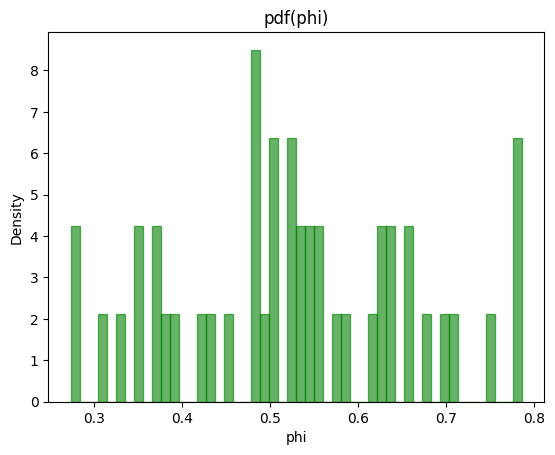

In [7]:
pattern_genes: list[PatternGene] = []
for i in range(N):
    pattern_genes.extend(
        [
            PatternGene(circular_params(), gene_id=i),
            PatternGene(corn_params(), gene_id=i),
            PatternGene(grid_params(), gene_id=i),
        ]
    )

# Mutation logics, uncomment to test
for gene in pattern_genes:
    gene.mutate("rand")
    gene.print_parameter_info()

for gene in pattern_genes:
    print("-" * 100)
    print(gene.param.transformation)

PatternGene.pdf_storage.save()
PatternGene.parameter_storage.save()

PatternGene.pdf_storage.plot_distribution("phi")

# Test combinations with two genes

In [8]:
from random import randint
from src.ga.gene.pattern.pattern_variations import K
from src.geometry.pattern_unit import PatternTransformationMatrix, Pattern

combined: list[Pattern] = []

for i in range(N):
    rand_shape_index = randint((i - 1) * 6, i * 6) if i > 0 else 0
    rand_shape = genes[rand_shape_index]
    t_mat = Pattern(
        PatternTransformationMatrix(
            rand_shape.pattern_unit,
            pattern_genes[i].param.transformation,
            pattern_bound=((-40 * K, 40 * K), (-40 * K, 40 * K)),
        ),
    )
    combined.append(t_mat)

circular phi_angle: 106.50651767753435
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 101.55896600820171
[PatternTransformation]: Fixing rotation count to 4
circular phi_angle: 106.12497632327731
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 40.0
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 78.00042804208708
[PatternTransformation]: Fixing rotation count to 4
circular phi_angle: 93.06844333359356
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 99.4301036838425
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 45.0
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 45.0
circular phi_angle: 98.0958185668384
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 106.3289208086756
[PatternTransformation]: Fixing rotation count to 1
circular phi_angle: 45.0
[PatternTransformation]: Fixing rotation count to 1


In [9]:
def draw_at(i: int):
    print(
        f"Draw > shape: {genes[i].label}, pattern: {pattern_genes[i].param.pattern_type}"
    )
    print(combined[i].pattern_matrix.shape)
    genes[i].print_parameter_info()
    pattern_genes[i].print_parameter_info()
    visualize_points(combined[i].pattern_matrix, combined[i].pattern_unit.grid.k)

In [10]:
for i in range(N):
    print("-" * 50)
    print(f"index: {i}")
    print(f"shape: {genes[i].label}, pattern: {pattern_genes[i].param.pattern_type}")
    print(f"dim: {combined[i].pattern_matrix.shape}")
    print(f"Shape Gene: {genes[i].parameter_table}")
    print(f"Pattern Gene: {pattern_genes[i].parameter_table}")
    print(f"K: {genes[i].param.k}")

--------------------------------------------------
index: 0
shape: DonutShape_0, pattern: circular_strict
dim: (2202, 2)
Shape Gene: {'r_inner': 4130608.8223963645, 'r_outer': 10139388.98971653}
Pattern Gene: {'di': 8011509.486830527, 'dx': 2683508.8944449537, 'phi': 0.5711986642890533}
K: 524288.0
--------------------------------------------------
index: 1
shape: Trapezoid_0, pattern: corn
dim: (44, 2)
Shape Gene: {'k1': 2946645.793401496, 'k2': 3098458.053919426}
Pattern Gene: {'di': 12433962.028147446, 'dx': 5727367.84941369, 'phi': 0.6364064566945788, 'rot_count': 3.0}
K: 524288.0
--------------------------------------------------
index: 2
shape: CircleShape_0, pattern: grid_strict
dim: (7840, 2)
Shape Gene: {'r': 1735048.8274002885}
Pattern Gene: {'dx': 1416411.0476996705, 'dy': 6617509.071112995}
K: 524288.0
--------------------------------------------------
index: 3
shape: TriangleShape_0, pattern: circular_strict
dim: (563, 2)
Shape Gene: {'l': 6936935.976748916}
Pattern Gene: 

Draw > shape: TriangleShape_2, pattern: circular_strict
(2526, 2)
parameter_list: [ l: 10393589.441562617, ]
parameter_list: [ di: 13918399.292730387, dx: 6674645.395167207, phi: 0.4487989505128276, ]


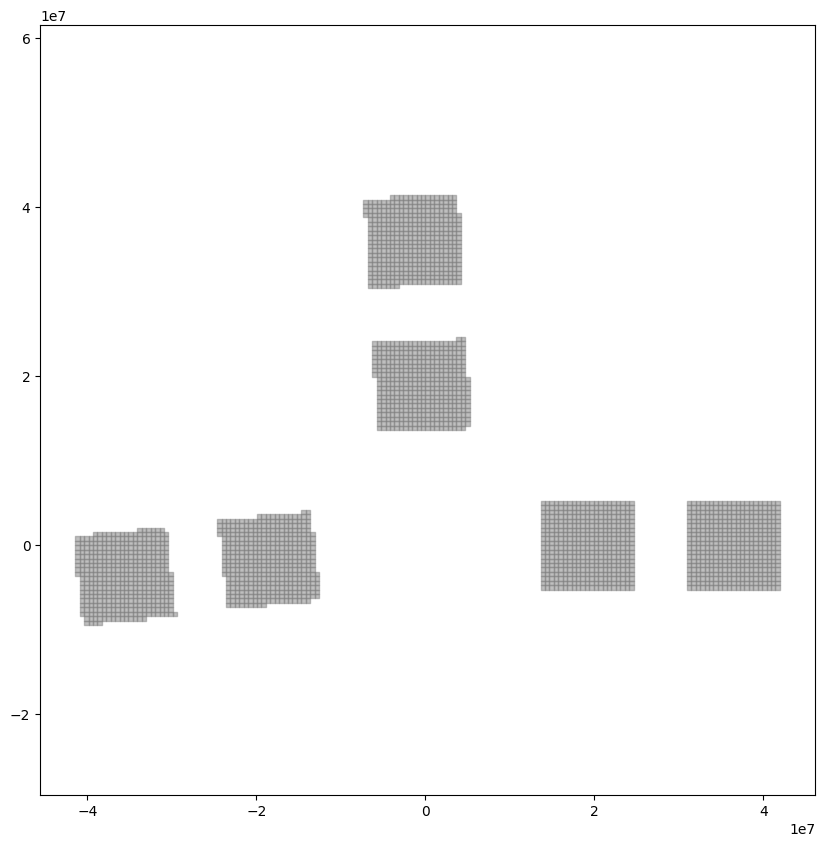

In [11]:
draw_at(15)

Draw > shape: DonutShape_0, pattern: circular_strict
(2202, 2)
parameter_list: [ r_inner: 4130608.8223963645, r_outer: 10139388.98971653, ]
parameter_list: [ di: 8011509.486830527, dx: 2683508.8944449537, phi: 0.5711986642890533, ]


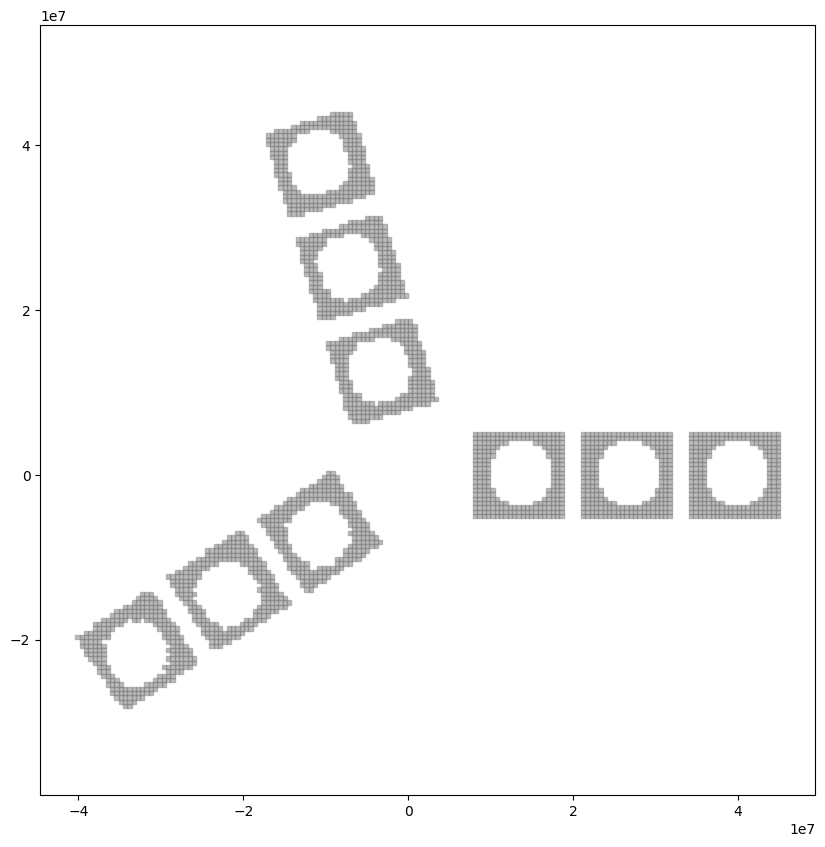

Draw > shape: Trapezoid_0, pattern: corn
(44, 2)
parameter_list: [ k1: 2946645.793401496, k2: 3098458.053919426, ]
parameter_list: [ di: 12433962.028147446, dx: 5727367.84941369, phi: 0.6364064566945788, rot_count: 3.0, ]


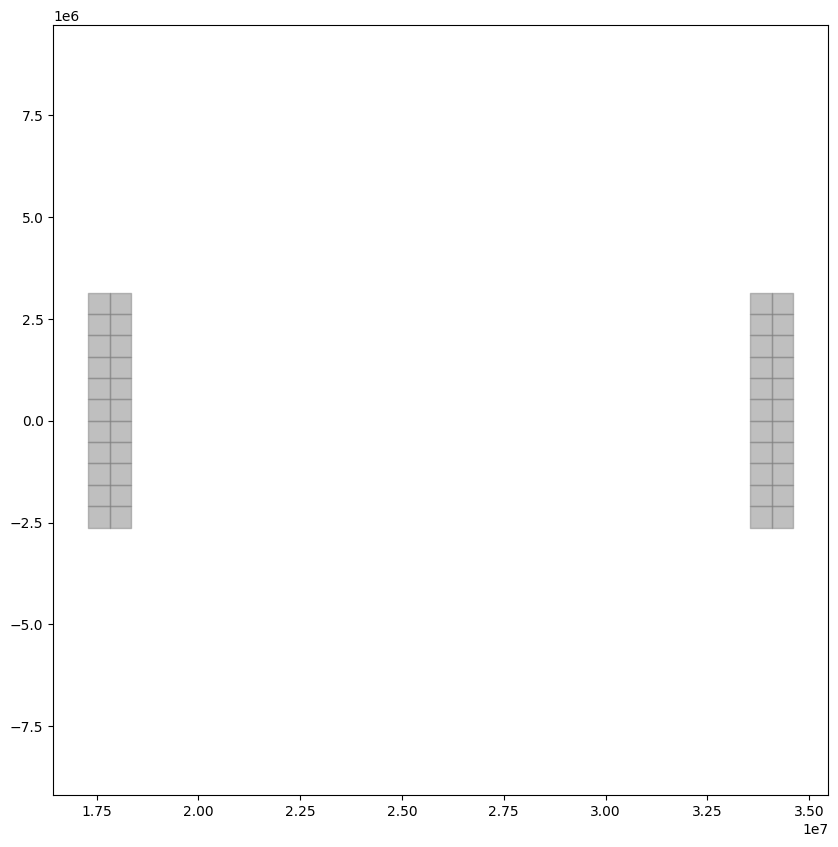

Draw > shape: CircleShape_0, pattern: grid_strict
(7840, 2)
parameter_list: [ r: 1735048.8274002885, ]
parameter_list: [ dx: 1416411.0476996705, dy: 6617509.071112995, ]


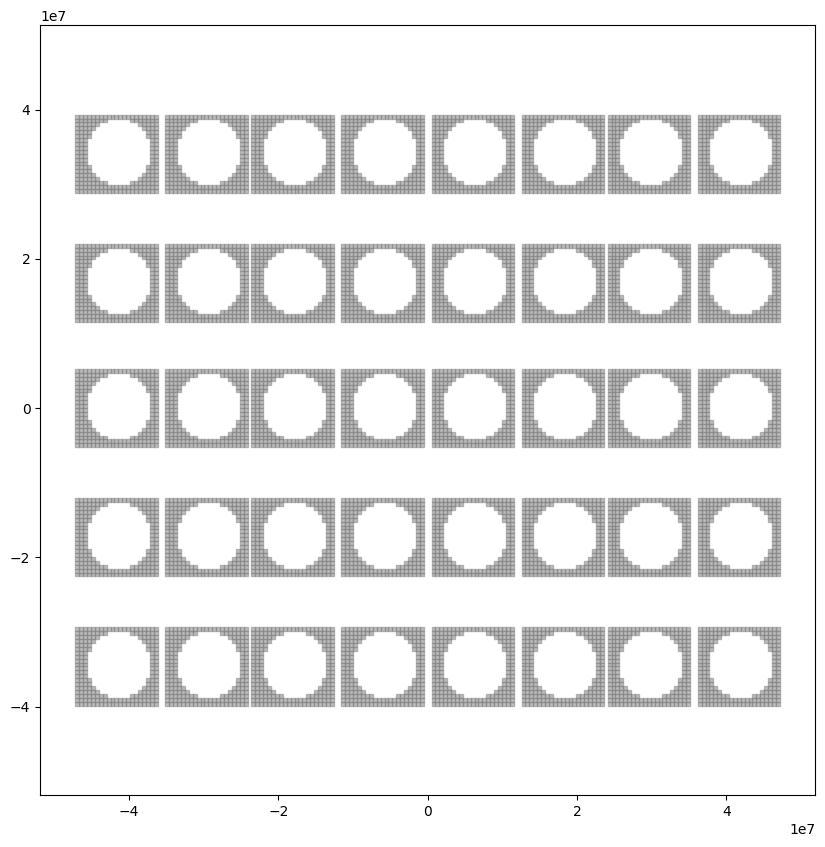

Draw > shape: TriangleShape_0, pattern: circular_strict
(563, 2)
parameter_list: [ l: 6936935.976748916, ]
parameter_list: [ di: 9893560.995218443, dx: 1578430.6387214959, phi: 0.41887902047863906, ]


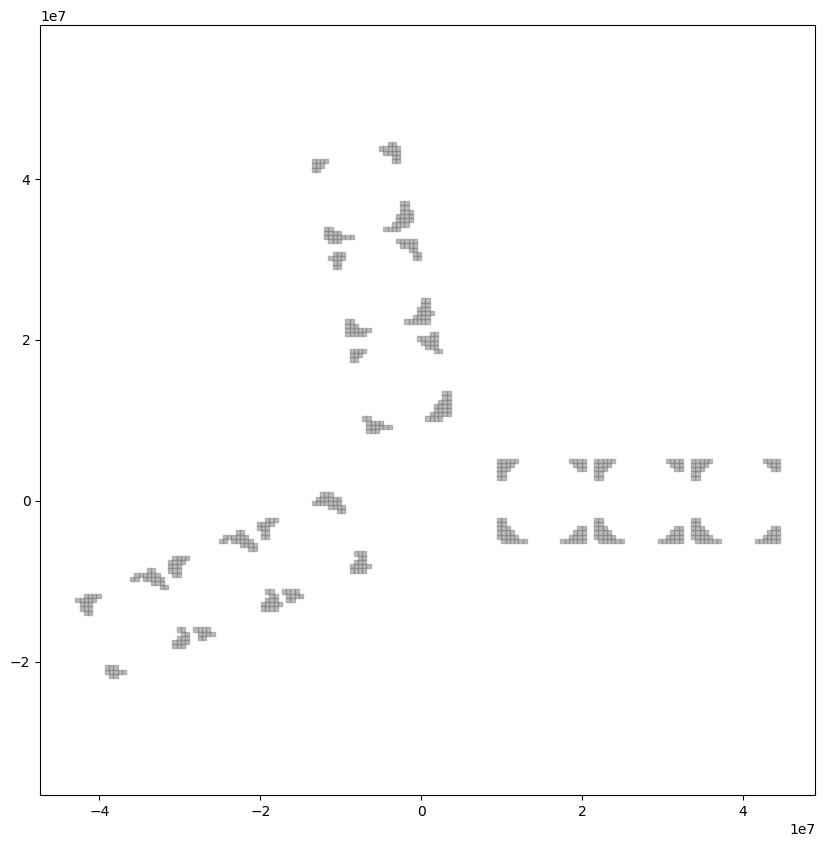

Draw > shape: WingShape_0, pattern: corn
(710, 2)
parameter_list: [ c: 2788699.8109943876, ]
parameter_list: [ di: 14022844.632048381, dx: 5840234.14894136, phi: 0.654909499920687, rot_count: 6.0, ]


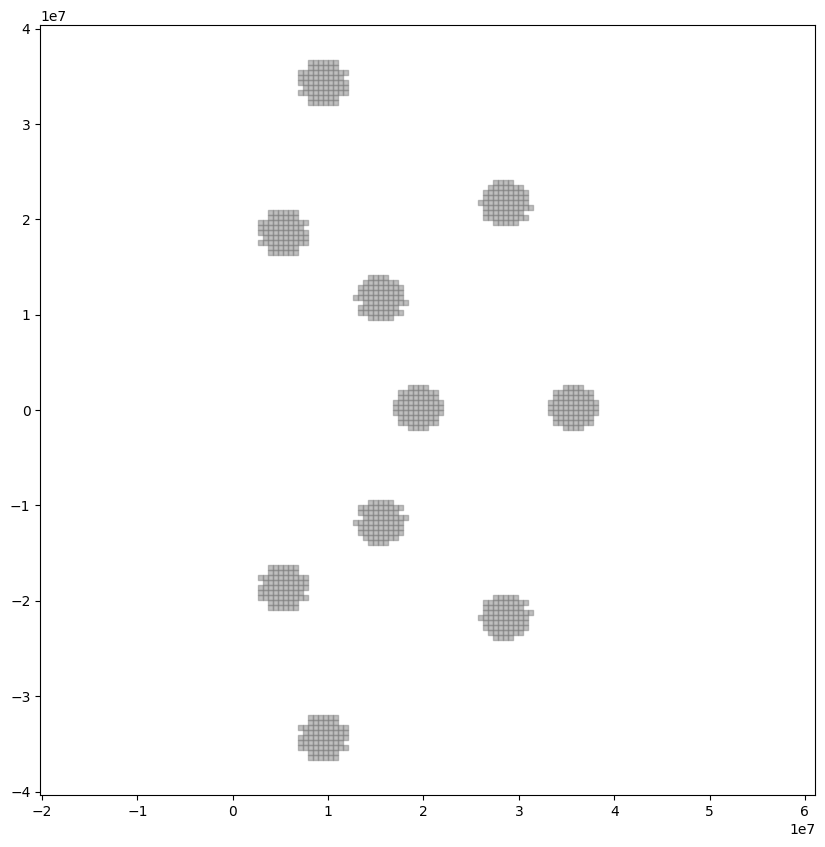

Draw > shape: HoldShape_0, pattern: grid_strict
(2080, 2)
parameter_list: [ hole_r: 3498072.912300744, ]
parameter_list: [ dx: 9453996.217447778, dy: 9957144.901230497, ]


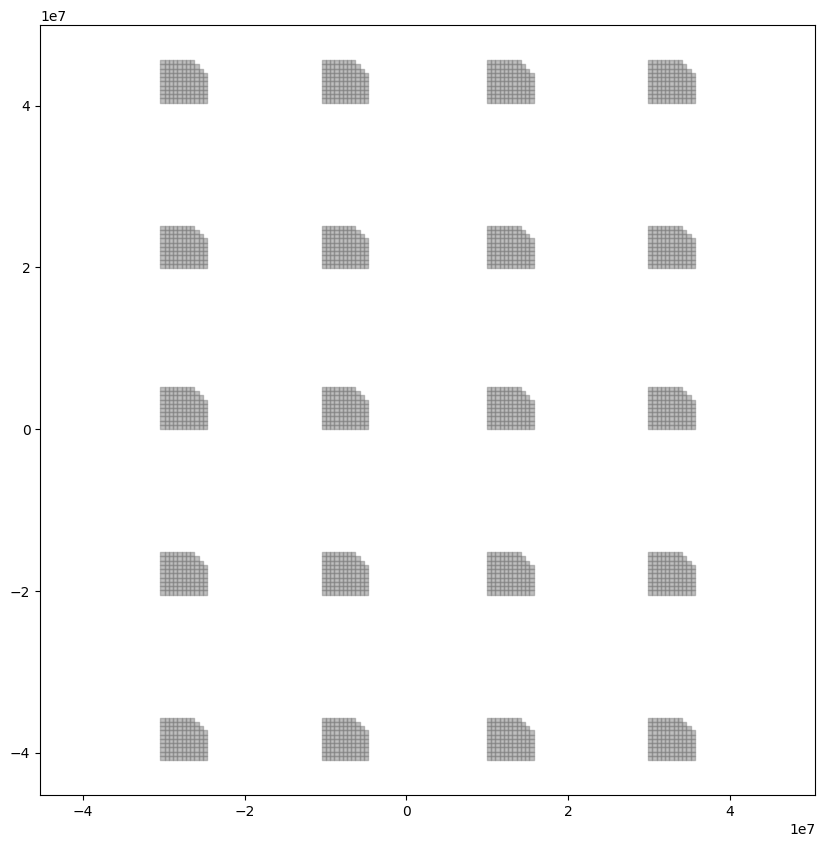

Draw > shape: DonutShape_1, pattern: circular_strict
(1362, 2)
parameter_list: [ r_inner: 4512058.184614324, r_outer: 8167787.302455487, ]
parameter_list: [ di: 8148504.251745846, dx: 8489776.861940365, phi: 0.5235987755982988, ]


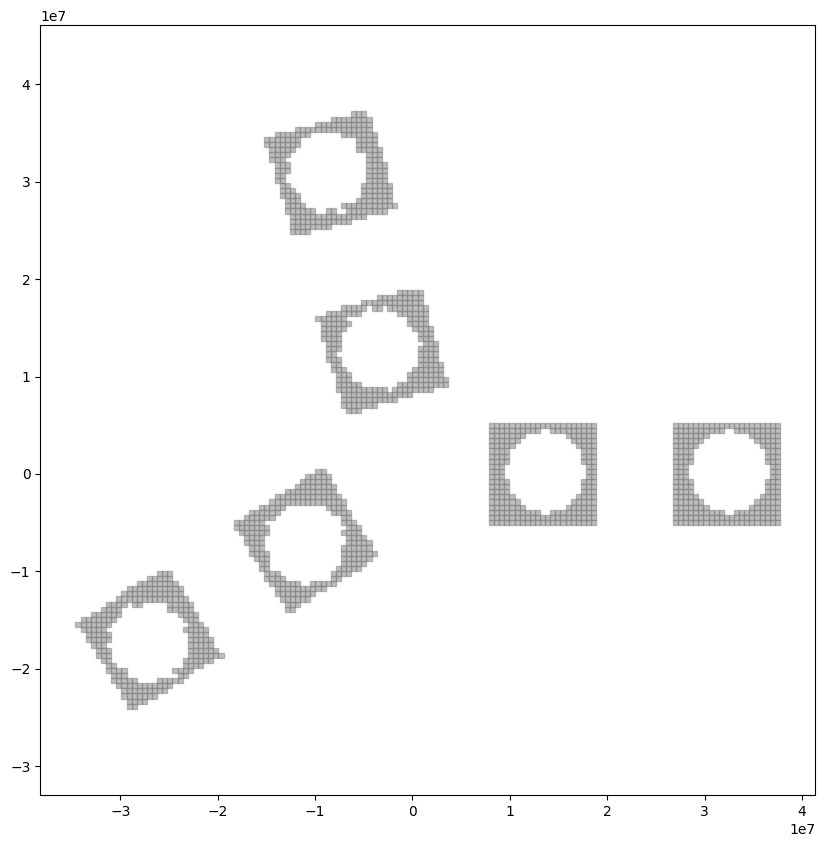

Draw > shape: Trapezoid_1, pattern: corn
(88, 2)
parameter_list: [ k1: 4226789.485192188, k2: 2698463.7848710516, ]
parameter_list: [ di: 13779997.824790081, dx: 9008314.67363758, phi: 0.27384687249882117, rot_count: 2.0, ]


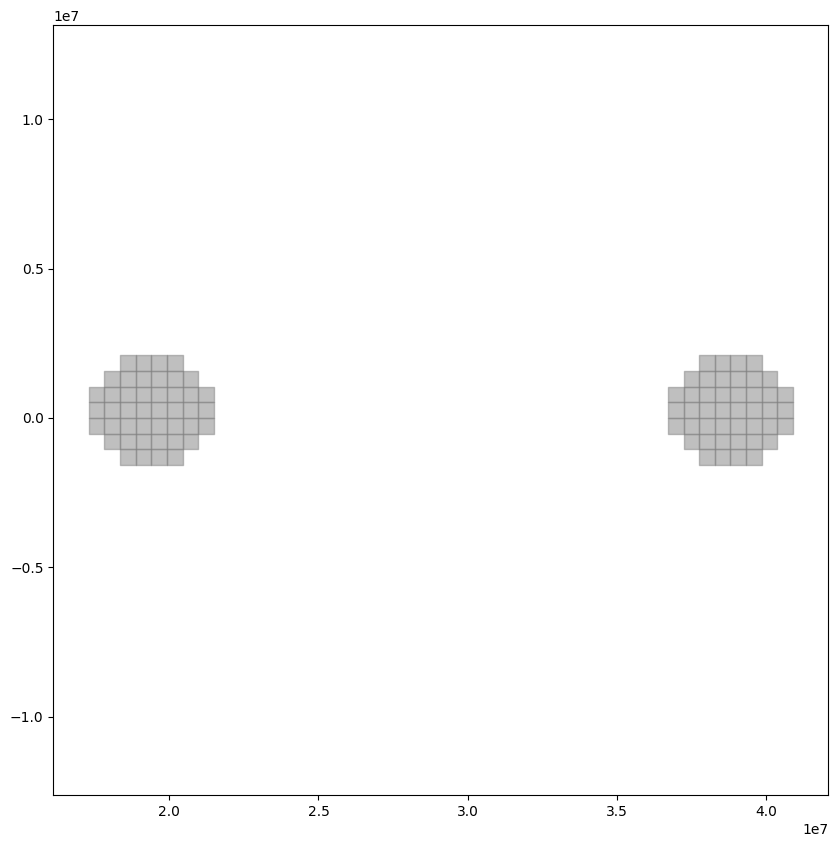

Draw > shape: TriangleShape_1, pattern: circular_strict
(948, 2)
parameter_list: [ l: 7688268.582875539, ]
parameter_list: [ di: 15708916.94031989, dx: 8549266.221228726, phi: 0.6981317007977318, ]


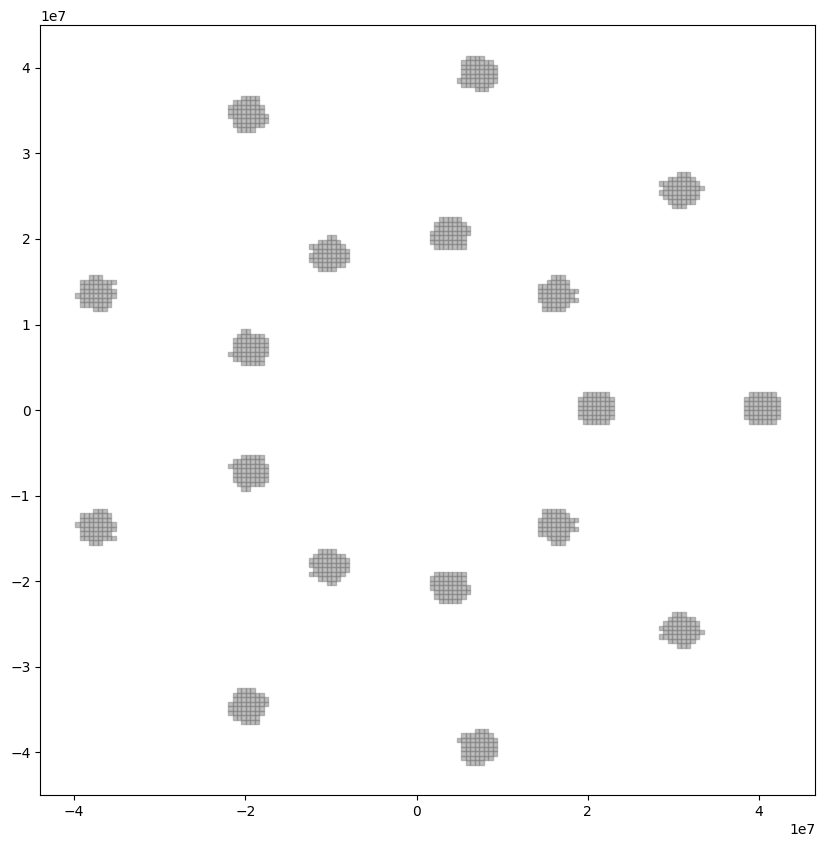

Draw > shape: WingShape_1, pattern: corn
(668, 2)
parameter_list: [ c: 2413603.573137015, ]
parameter_list: [ di: 8923427.262361305, dx: 7266859.563479474, phi: 0.5840446260559624, rot_count: 4.0, ]


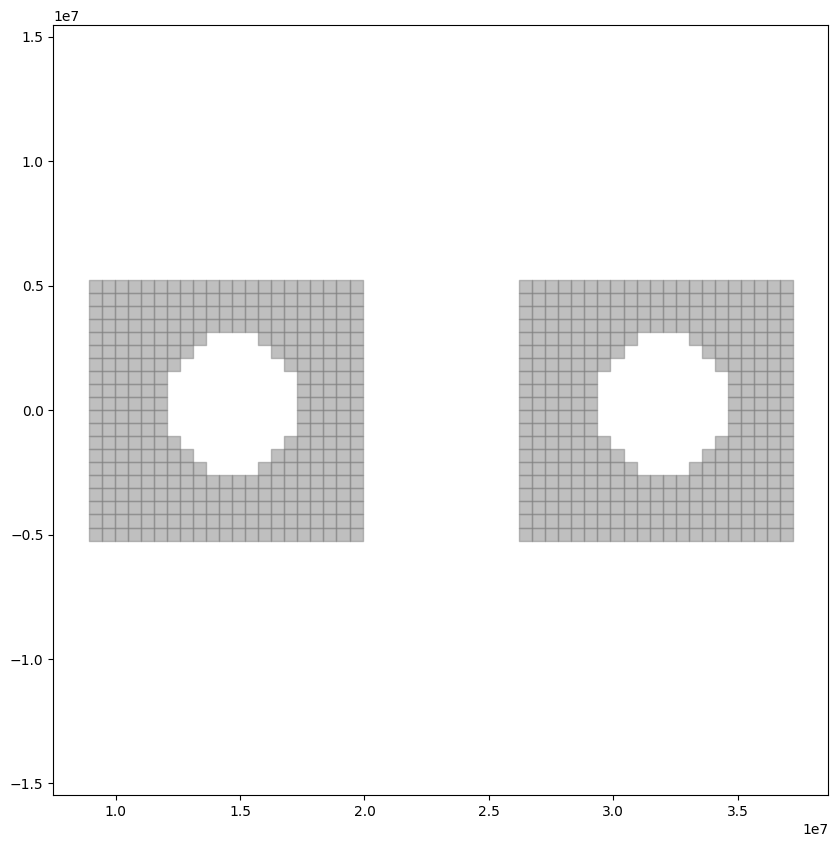

Draw > shape: HoldShape_1, pattern: grid_strict
(7600, 2)
parameter_list: [ hole_r: 3802789.5364388544, ]
parameter_list: [ dx: 6482960.244428132, dy: 6162911.513080739, ]


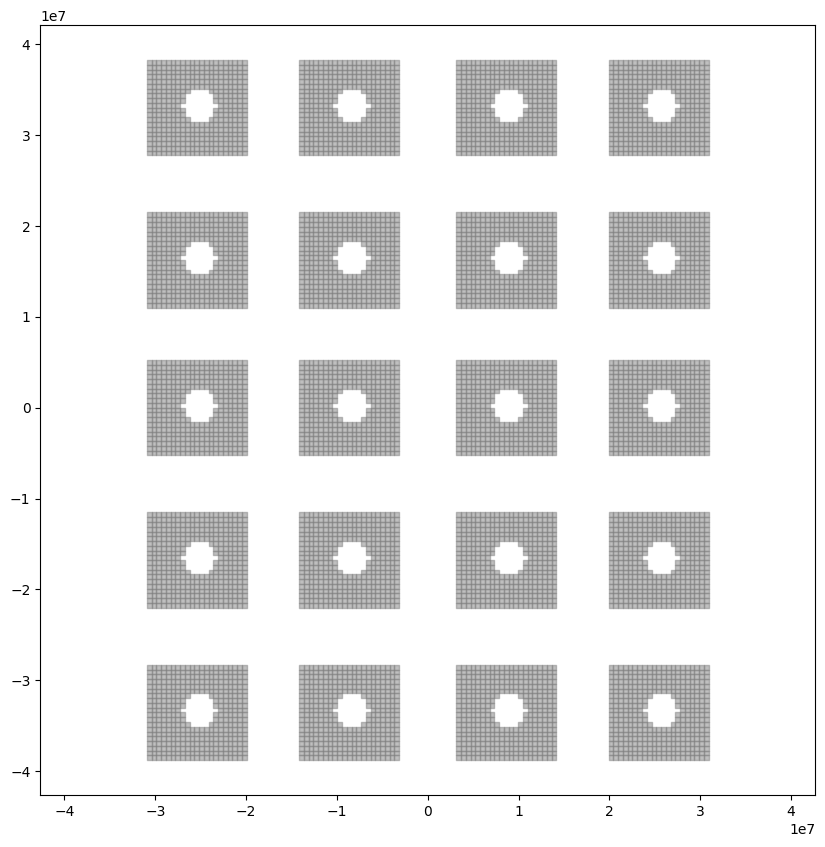

Draw > shape: DonutShape_2, pattern: circular_strict
(978, 2)
parameter_list: [ r_inner: 5698847.333753319, r_outer: 7413099.475732702, ]
parameter_list: [ di: 13705947.317936022, dx: 5524060.73395786, phi: 0.3490658503988659, ]


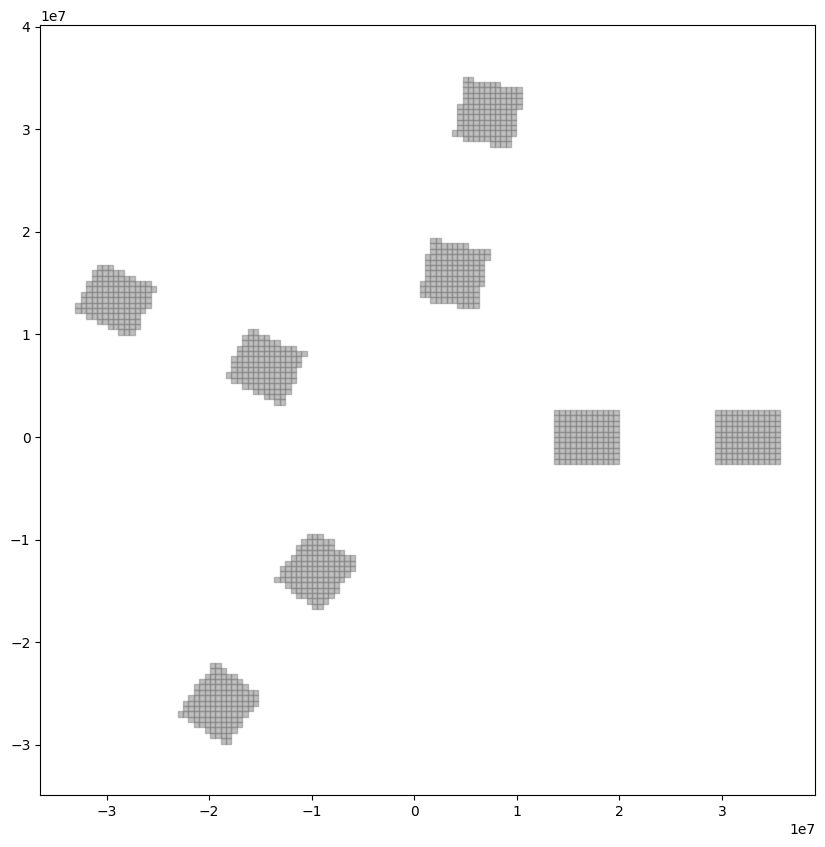

Draw > shape: Trapezoid_2, pattern: corn
(1916, 2)
parameter_list: [ k1: 5181458.316140775, k2: 4950274.71776917, ]
parameter_list: [ di: 14677542.569203965, dx: 6263450.476354949, phi: 0.7114996356245664, rot_count: 6.0, ]


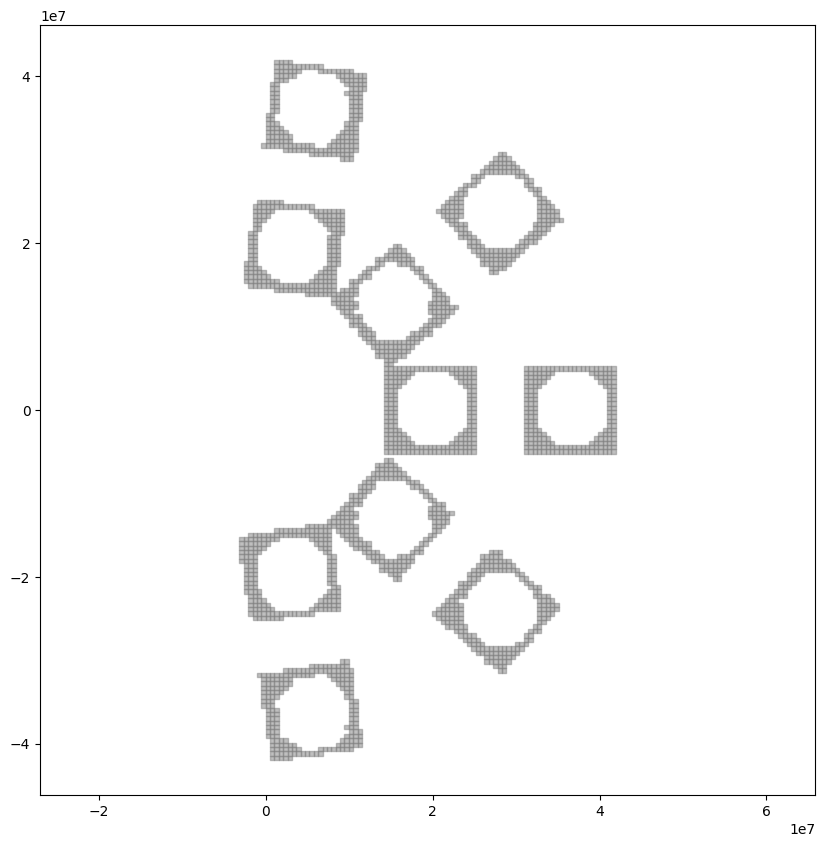

Draw > shape: CircleShape_2, pattern: grid_strict
(5040, 2)
parameter_list: [ r: 3043039.94873559, ]
parameter_list: [ dx: 3214195.076775633, dy: 6268338.054980921, ]


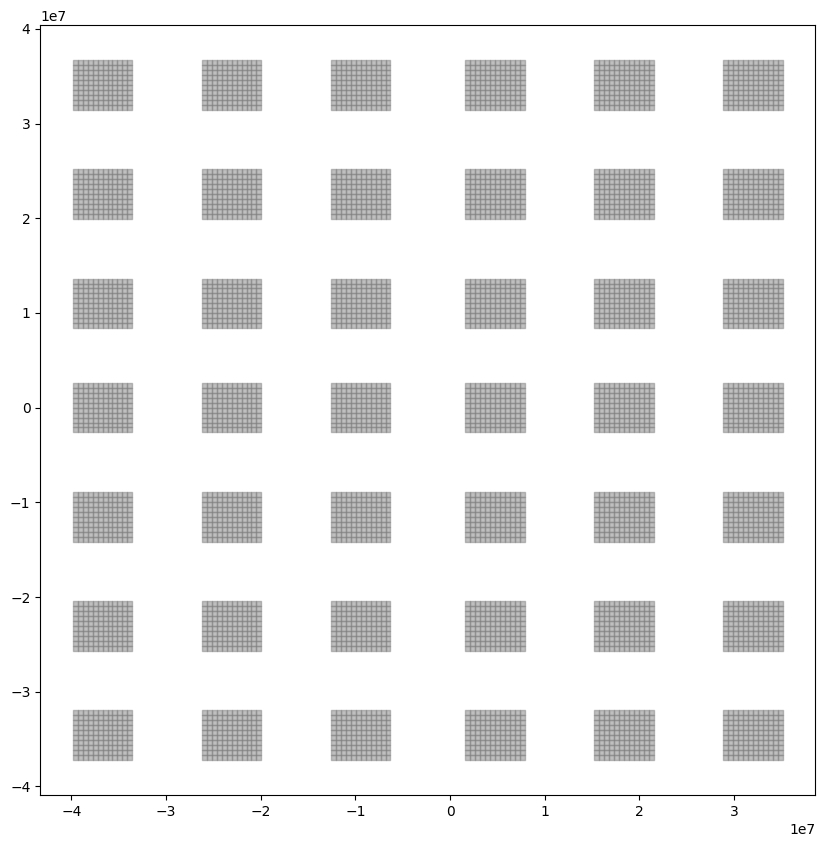

Draw > shape: TriangleShape_2, pattern: circular_strict
(2526, 2)
parameter_list: [ l: 10393589.441562617, ]
parameter_list: [ di: 13918399.292730387, dx: 6674645.395167207, phi: 0.4487989505128276, ]


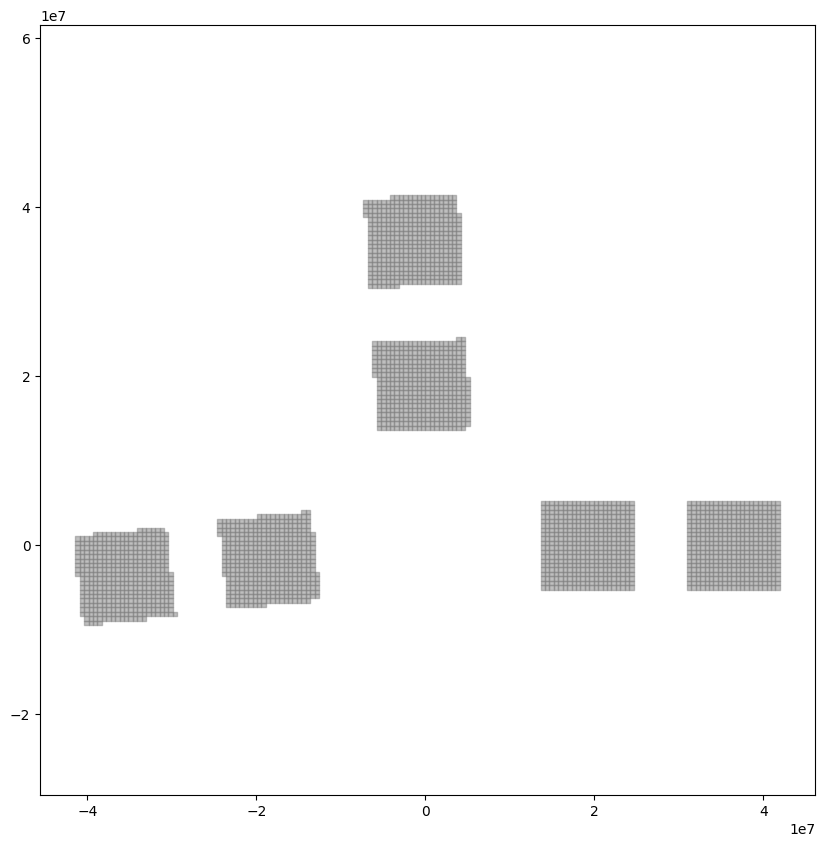

Draw > shape: WingShape_2, pattern: corn
(148, 2)
parameter_list: [ c: 2165806.315617501, ]
parameter_list: [ di: 11884966.754828941, dx: 10032202.746975426, phi: 0.6176033330757035, rot_count: 5.0, ]


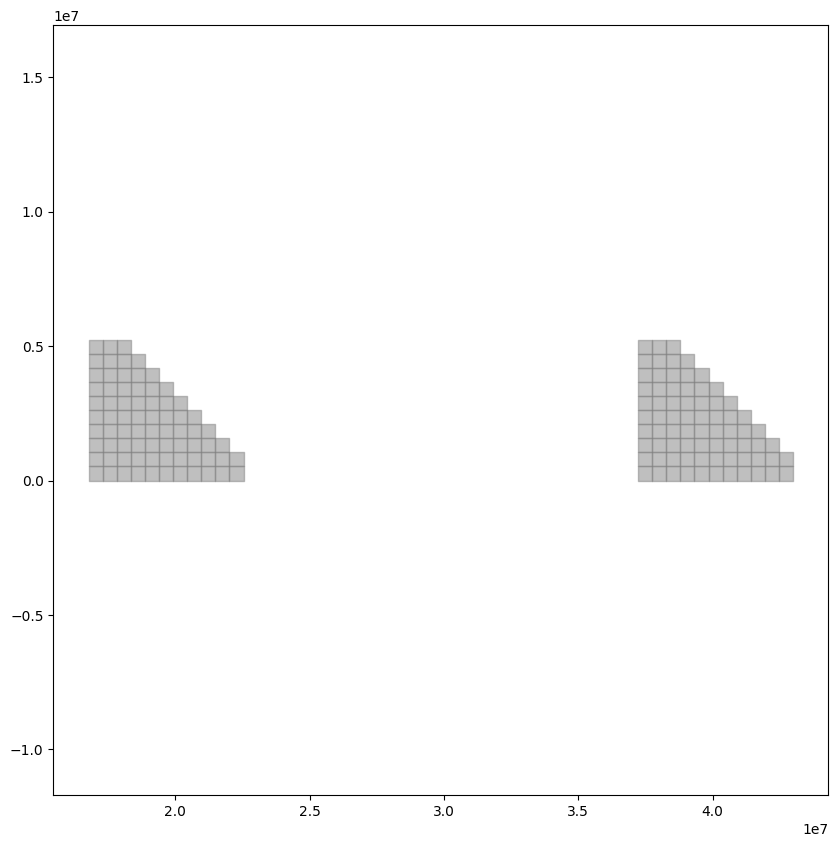

Draw > shape: HoldShape_2, pattern: grid_strict
(1050, 2)
parameter_list: [ hole_r: 3047591.0451830765, ]
parameter_list: [ dx: 5139404.023815192, dy: 8023412.086442235, ]


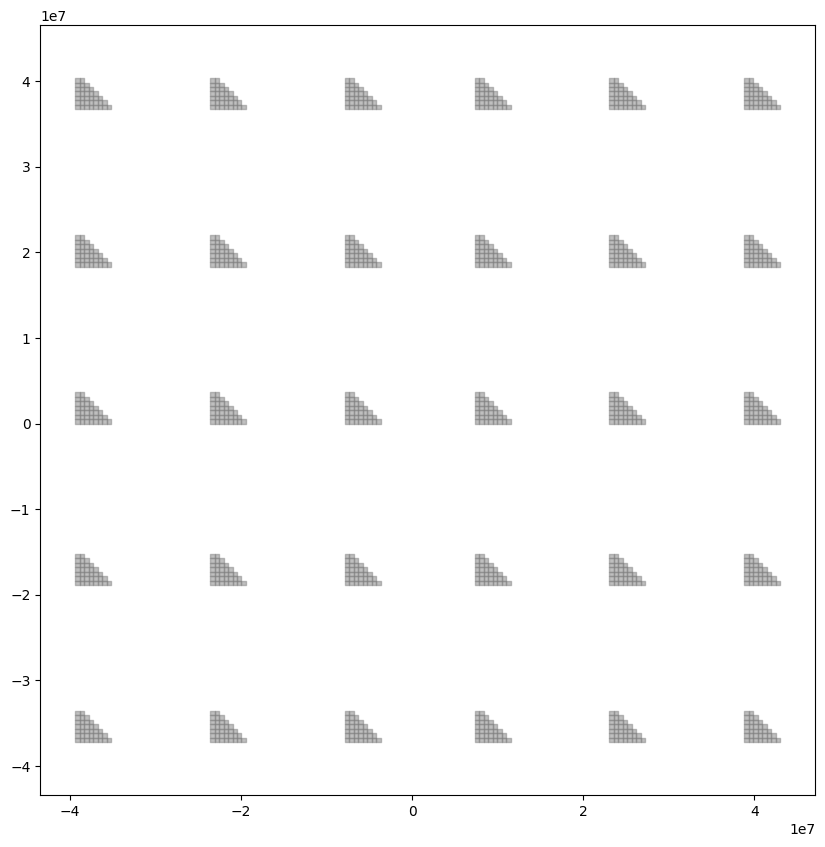

Draw > shape: DonutShape_3, pattern: circular_strict
(392, 2)
parameter_list: [ r_inner: 4217352.910025108, r_outer: 7343411.7375615295, ]
parameter_list: [ di: 10789354.71109664, dx: 9620696.089952763, phi: 0.5235987755982988, ]


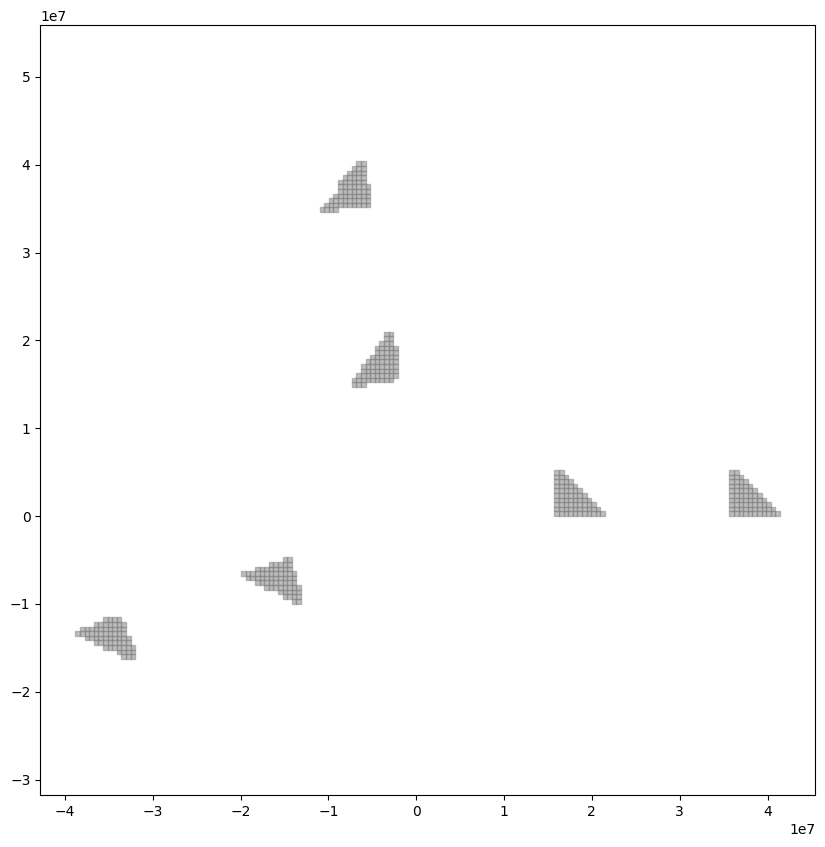

Draw > shape: Trapezoid_3, pattern: corn
(158, 2)
parameter_list: [ k1: 4647129.815239155, k2: 4885335.383704379, ]
parameter_list: [ di: 12907843.86497869, dx: 3776567.8735069567, phi: 0.499489192346817, rot_count: 6.0, ]


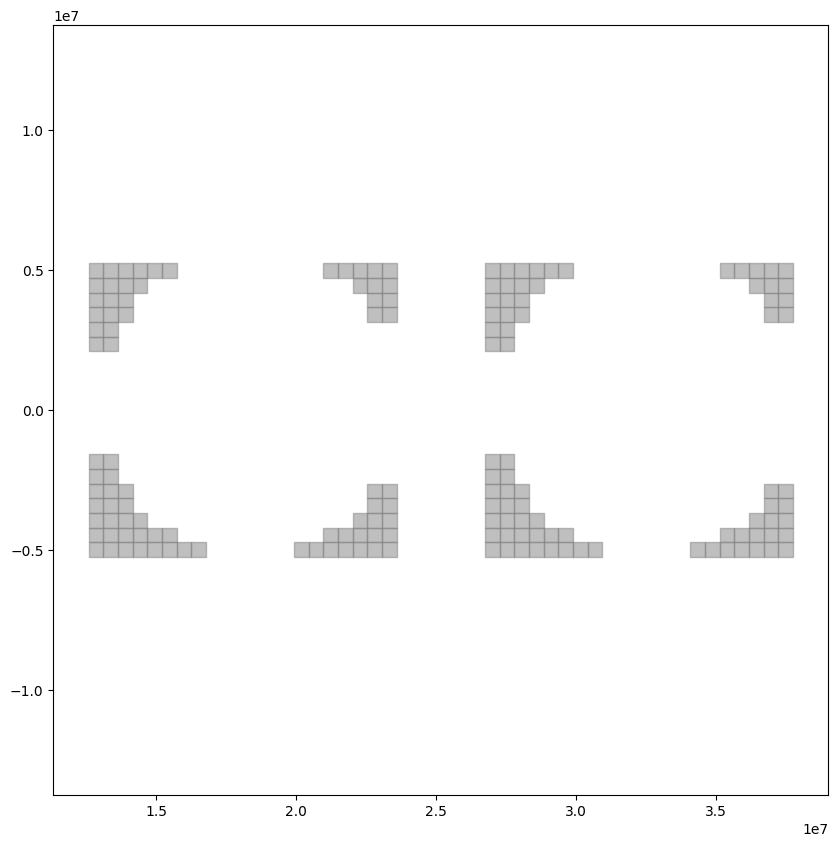

Draw > shape: CircleShape_3, pattern: grid_strict
(9900, 2)
parameter_list: [ r: 2331937.740916528, ]
parameter_list: [ dx: 2599964.7619020697, dy: 8673755.837407064, ]


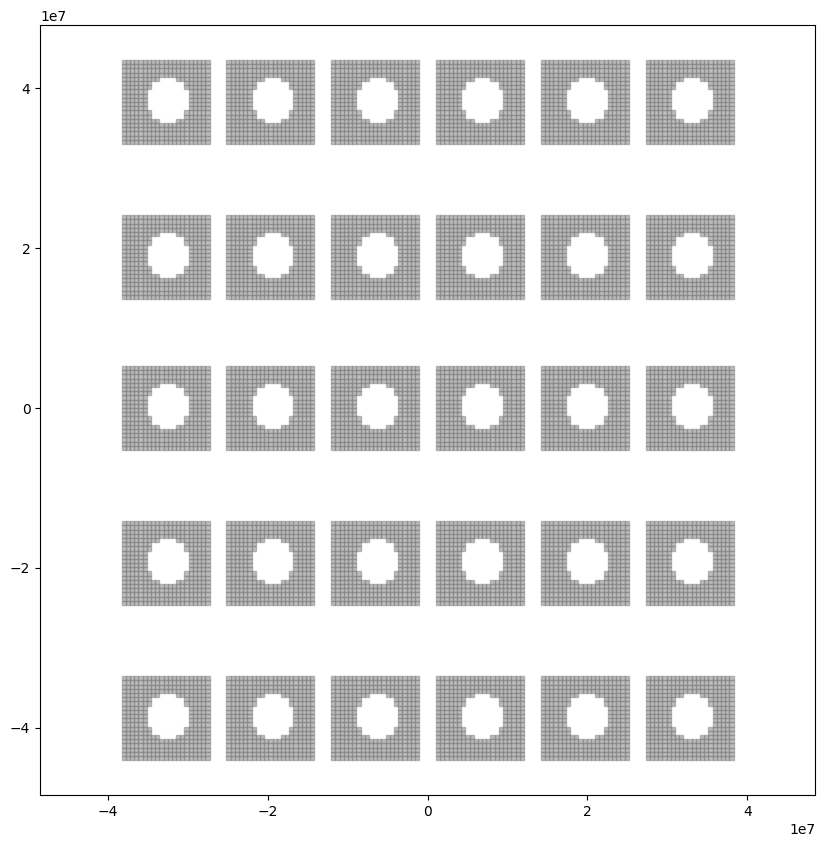

Draw > shape: TriangleShape_3, pattern: circular_strict
(1946, 2)
parameter_list: [ l: 3492042.6440731096, ]
parameter_list: [ di: 14104094.53048396, dx: 6637744.868311107, phi: 0.7853981633974483, ]


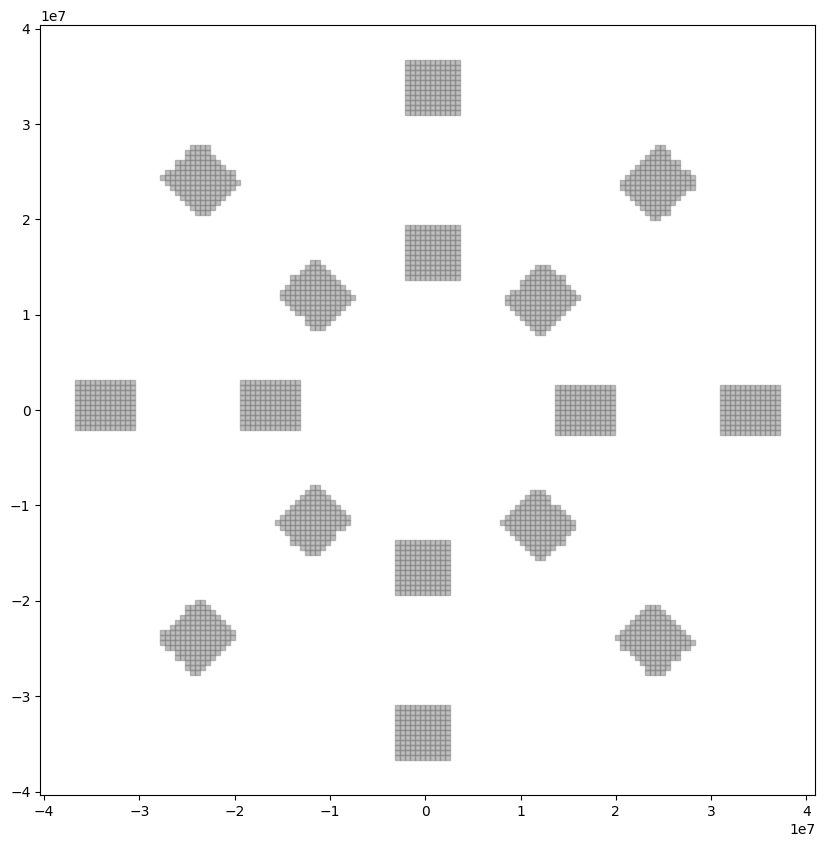

Draw > shape: WingShape_3, pattern: corn
(104, 2)
parameter_list: [ c: 4020166.6892226795, ]
parameter_list: [ di: 8307486.25047874, dx: 10013992.129637918, phi: 0.35558842208064634, rot_count: 3.0, ]


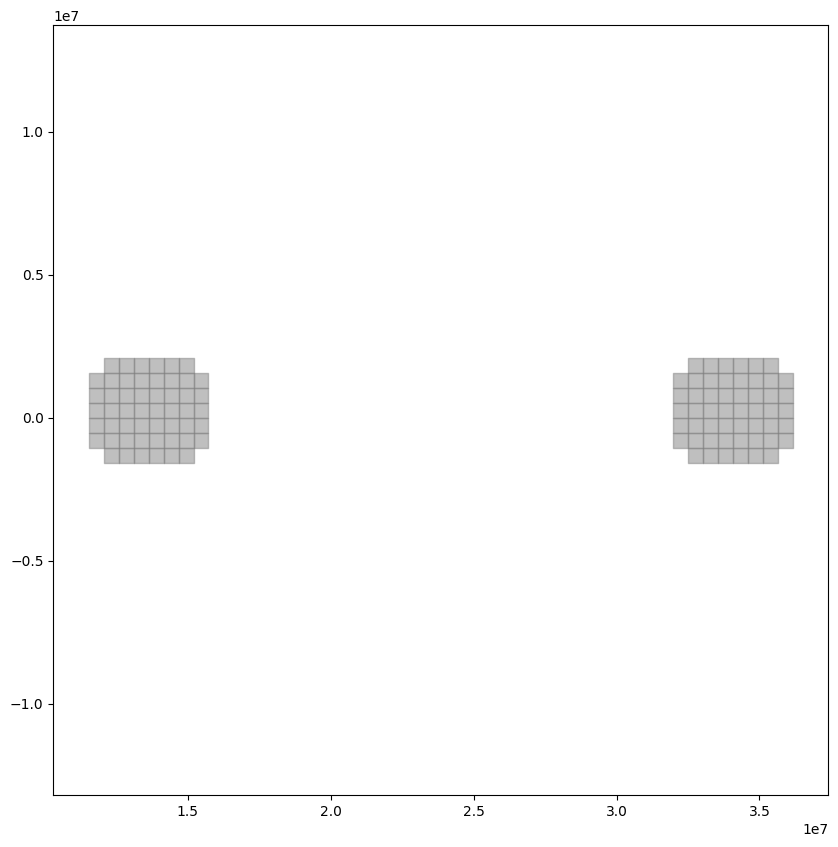

Draw > shape: HoldShape_3, pattern: grid_strict
(1040, 2)
parameter_list: [ hole_r: 3021250.681586113, ]
parameter_list: [ dx: 7390444.662020291, dy: 9674152.172946554, ]


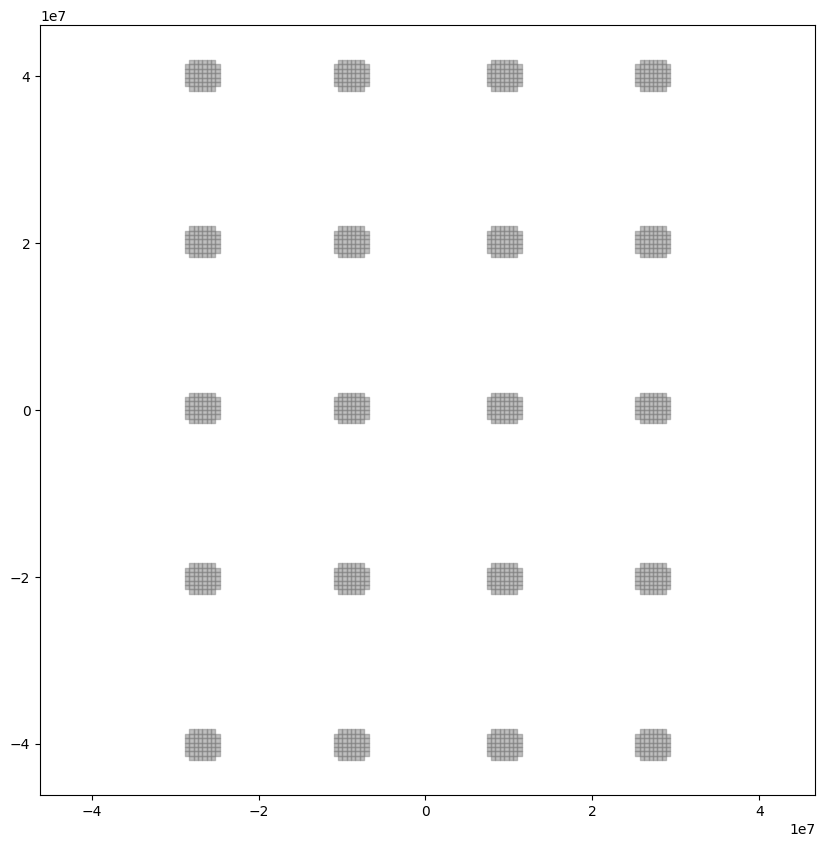

Draw > shape: DonutShape_4, pattern: circular_strict
(880, 2)
parameter_list: [ r_inner: 4254062.890824309, r_outer: 10037304.416743137, ]
parameter_list: [ di: 13639957.385951363, dx: 6753721.406542742, phi: 0.7853981633974483, ]


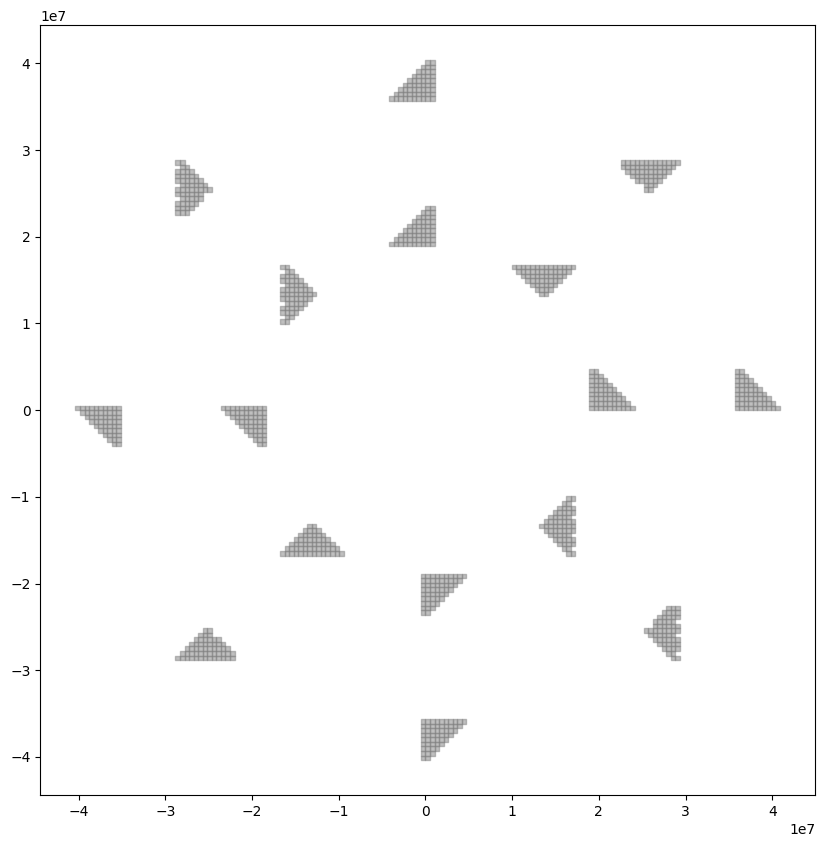

Draw > shape: Trapezoid_4, pattern: corn
(1225, 2)
parameter_list: [ k1: 4980997.727927206, k2: 4580419.956224081, ]
parameter_list: [ di: 11864613.898555003, dx: 8250286.594439874, phi: 0.6251584589923489, rot_count: 5.0, ]


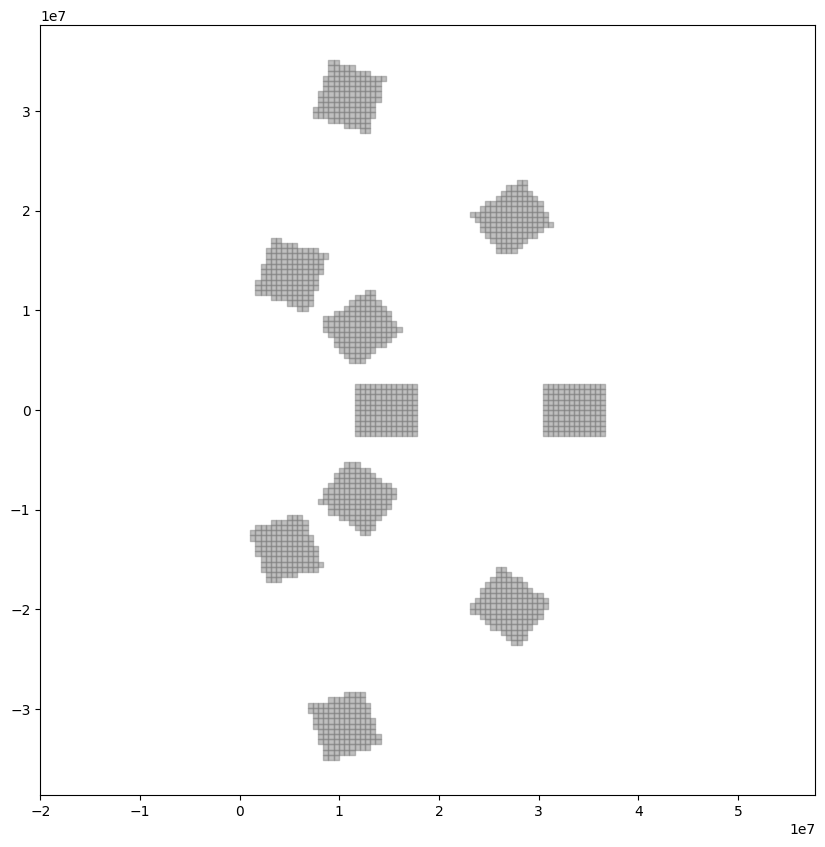

Draw > shape: CircleShape_4, pattern: grid_strict
(1428, 2)
parameter_list: [ r: 2871922.9664738486, ]
parameter_list: [ dx: 2606650.451467819, dy: 2560941.7581640887, ]


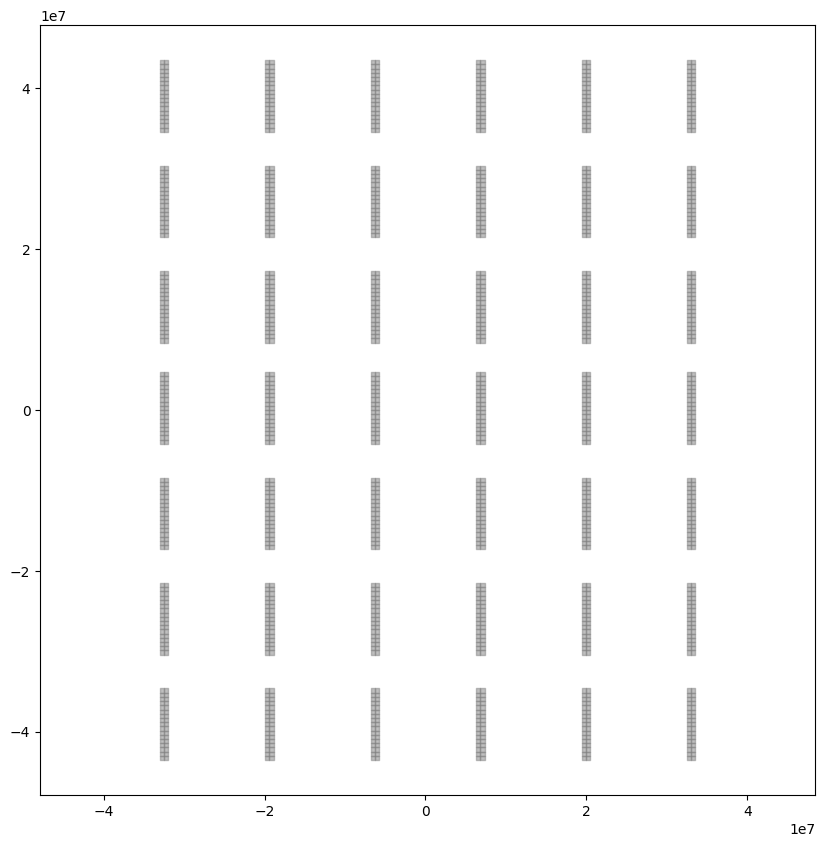

Draw > shape: TriangleShape_4, pattern: circular_strict
(559, 2)
parameter_list: [ l: 7888116.52603753, ]
parameter_list: [ di: 11384061.04262791, dx: 4996760.702099254, phi: 0.6283185307179586, ]


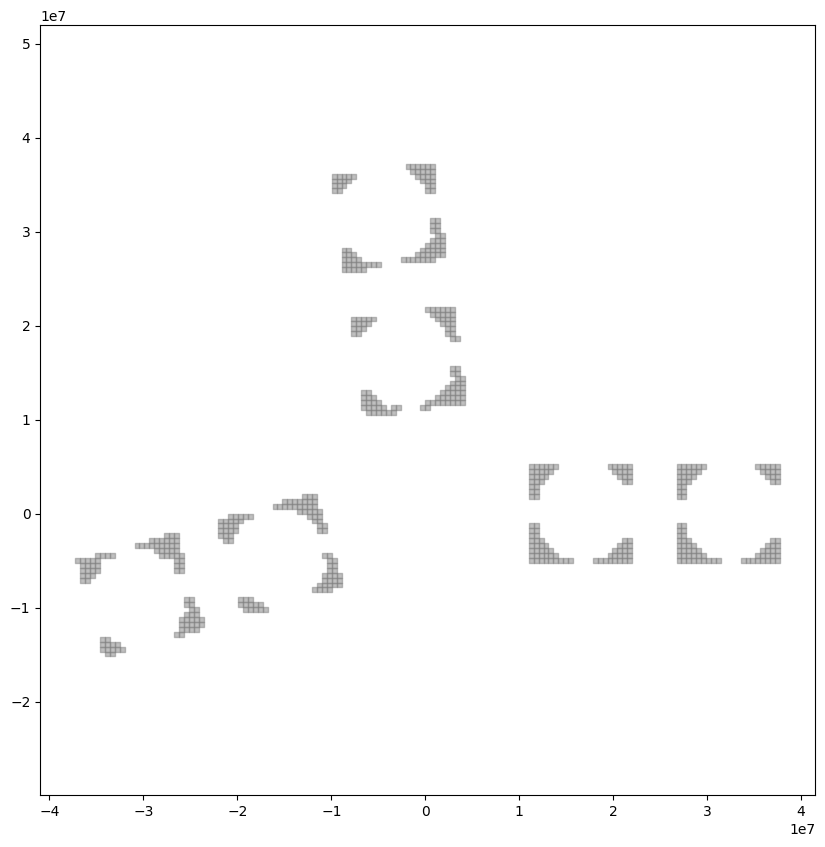

Draw > shape: WingShape_4, pattern: corn
(200, 2)
parameter_list: [ c: 4464642.523650281, ]
parameter_list: [ di: 13658729.850484613, dx: 8907542.463322062, phi: 0.43079870207073523, rot_count: 5.0, ]


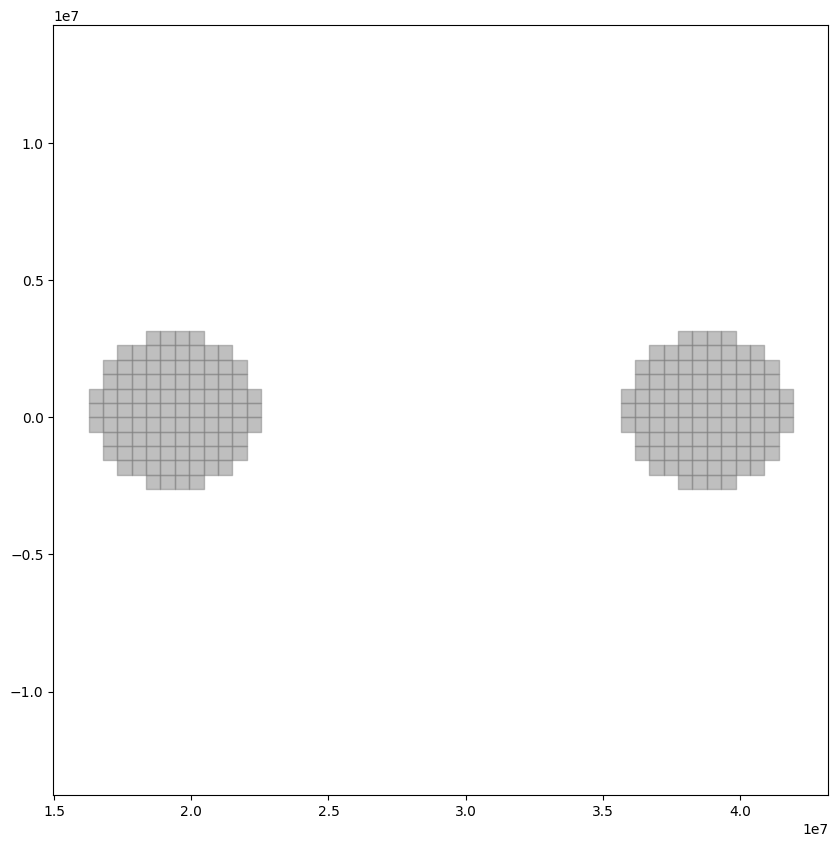

Draw > shape: HoldShape_4, pattern: grid_strict
(880, 2)
parameter_list: [ hole_r: 4048398.647502429, ]
parameter_list: [ dx: 9793976.837287439, dy: 7573290.330591191, ]


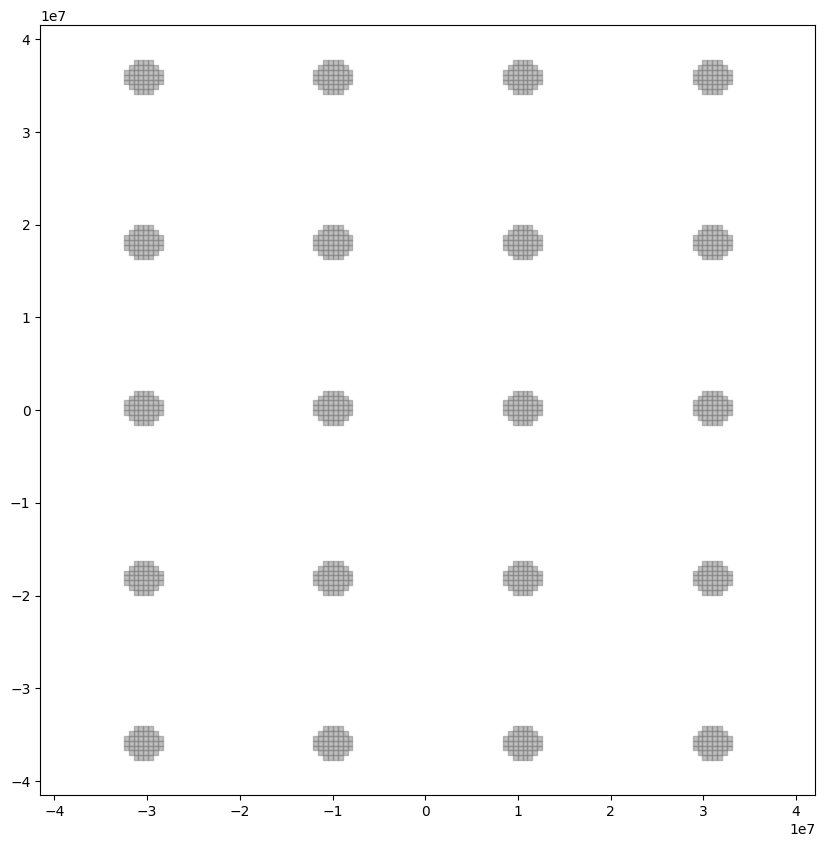

Draw > shape: DonutShape_5, pattern: circular_strict
(782, 2)
parameter_list: [ r_inner: 4685833.139285683, r_outer: 9559901.479179556, ]
parameter_list: [ di: 8075131.4084377, dx: 7426925.598292071, phi: 0.6981317007977318, ]


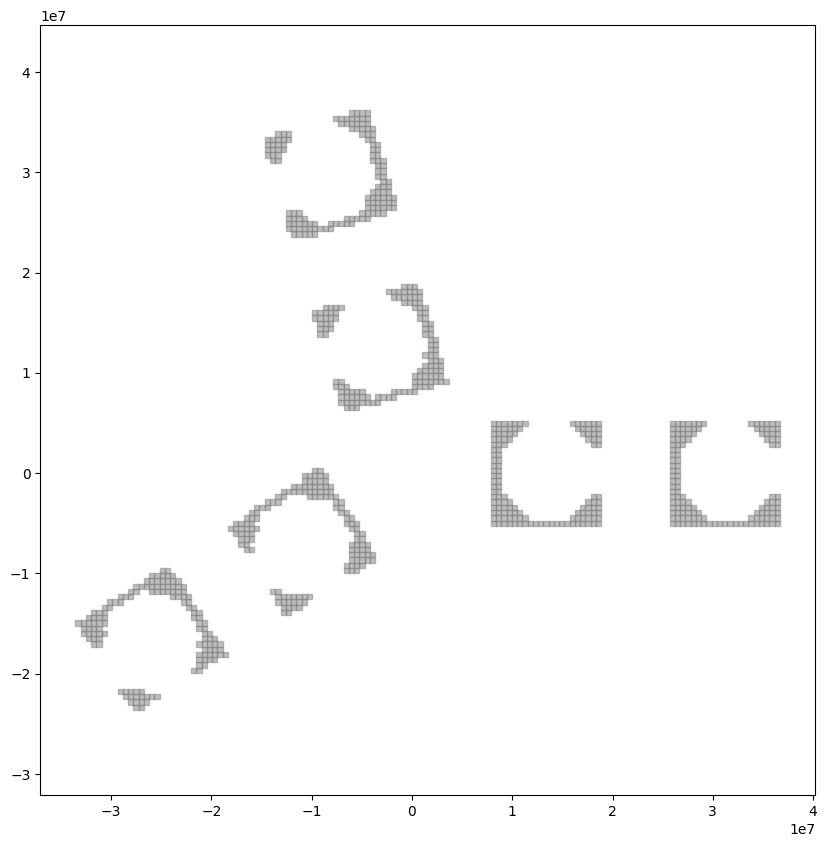

Draw > shape: Trapezoid_5, pattern: corn
(314, 2)
parameter_list: [ k1: 2520578.1239263737, k2: 4527473.30870289, ]
parameter_list: [ di: 14807956.491250413, dx: 2533785.60813874, phi: 0.5450111328938604, rot_count: 4.0, ]


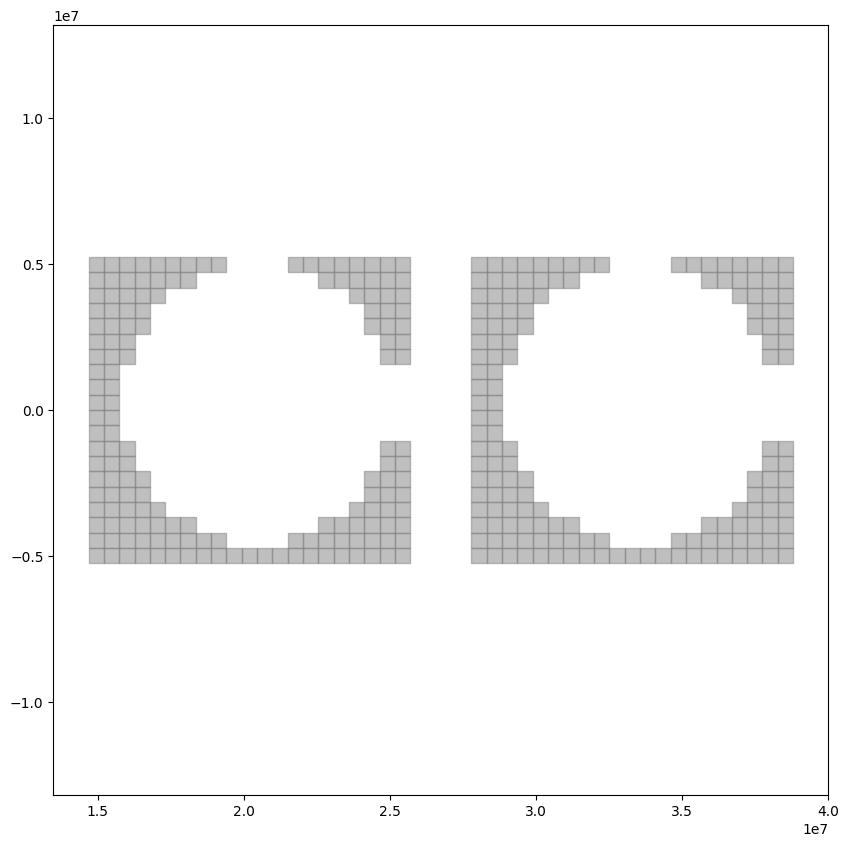

Draw > shape: CircleShape_5, pattern: grid_strict
(2100, 2)
parameter_list: [ r: 1889928.7824363844, ]
parameter_list: [ dx: 3853324.560222341, dy: 4497961.029183425, ]


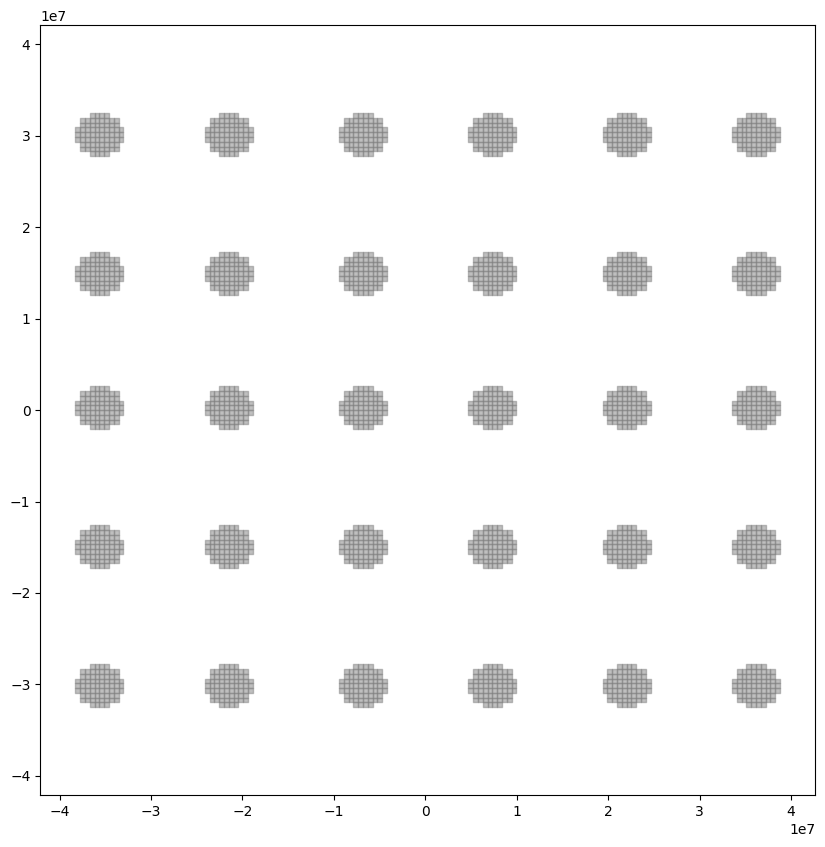

Draw > shape: TriangleShape_5, pattern: circular_strict
(1958, 2)
parameter_list: [ l: 6998882.70303686, ]
parameter_list: [ di: 10132450.709364844, dx: 3749753.2152989674, phi: 0.7853981633974483, ]


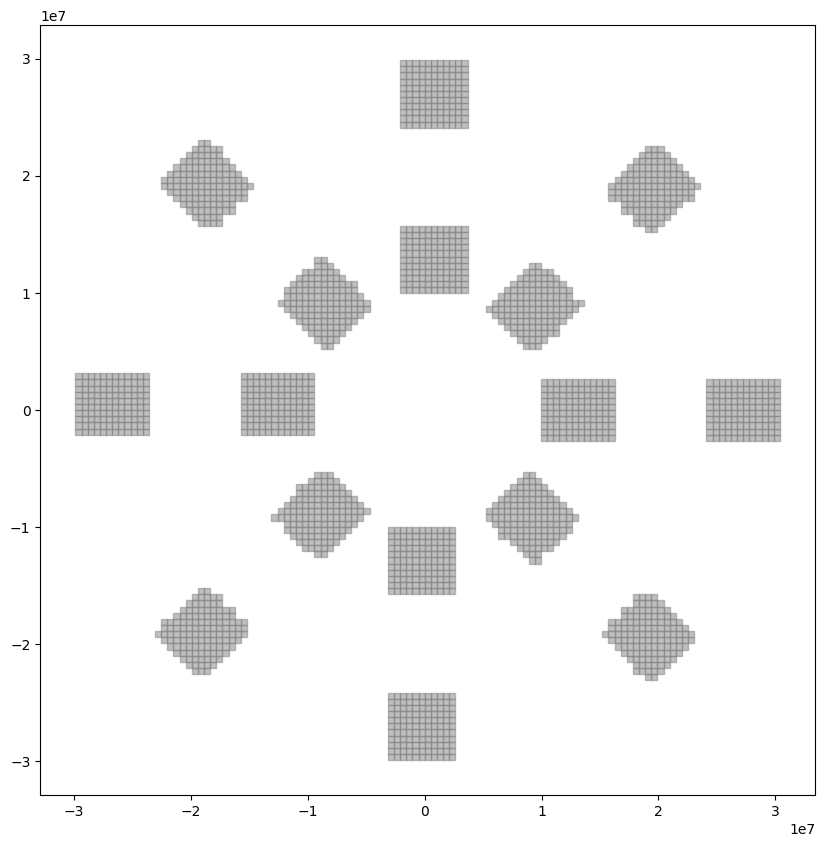

Draw > shape: WingShape_5, pattern: corn
(330, 2)
parameter_list: [ c: 2298912.9387853476, ]
parameter_list: [ di: 9577983.341143318, dx: 615066.7786728232, phi: 0.48305353387058936, rot_count: 6.0, ]


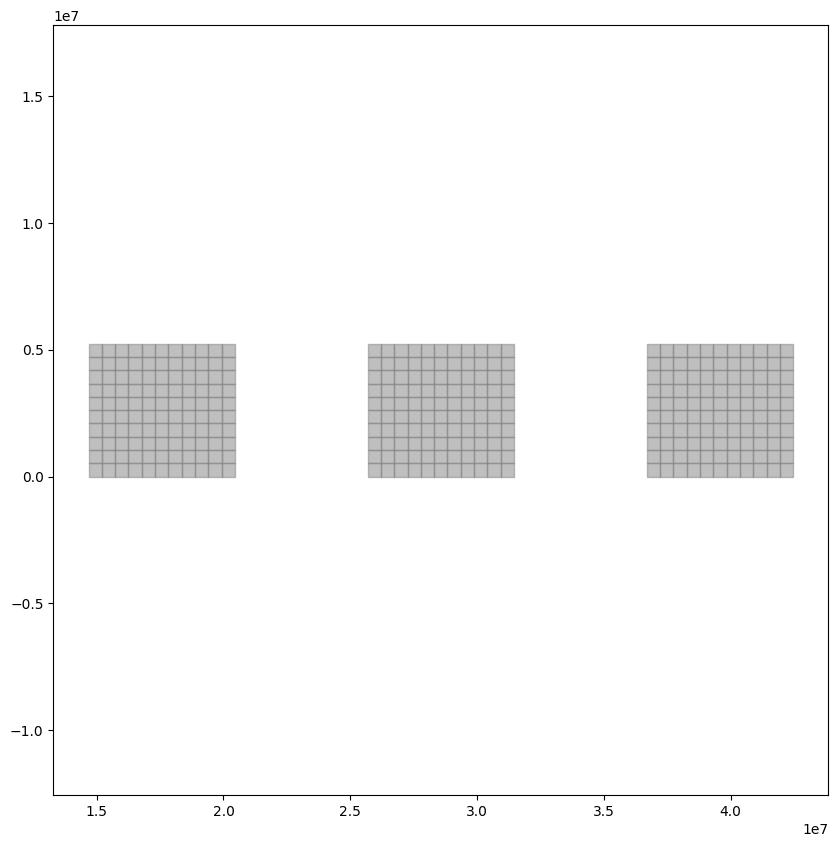

In [12]:
for i in range(N):
    if combined[i].pattern_matrix.shape[0] < 10000:
        draw_at(i)

In [13]:
# for i in range(100):
#     if (
#         combined[i].pattern_matrix.shape[0] > 10000
#         and combined[i].pattern_matrix.shape[0] < 20000
#     ):
#         draw_at(i)